<a href="https://colab.research.google.com/github/MohitGupta2021/predict-of-temerature-using-linear-regression/blob/main/classification_of_temperature_reading_using_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
from google.colab import files

In [45]:
df=pd.read_csv('/content/IOT-temp.csv')

In [46]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [48]:
len(df['id'].unique())

97605

In [49]:
df['room_id/id'].unique()

array(['Room Admin'], dtype=object)

In [50]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [51]:
data=df.iloc[:,3:]

In [52]:
data.head()

,temp,out/in
0,29,In
1,29,In
2,41,Out
3,41,Out
4,31,In


In [53]:
data.shape

(97606, 2)

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['out/in']=le.fit_transform(data['out/in'])

In [55]:
data.head()

,temp,out/in
0,29,0
1,29,0
2,41,1
3,41,1
4,31,0


in=0
out=1


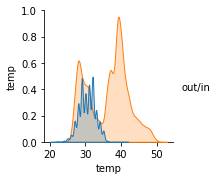

In [56]:
import seaborn  as sns
sns.pairplot(data=data,hue='out/in')

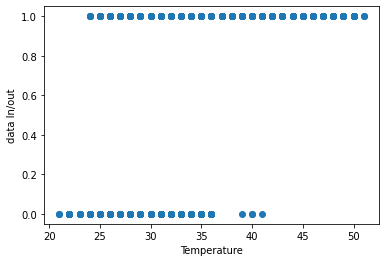

In [57]:
import matplotlib.pyplot as plt
plt.scatter(data['temp'],data['out/in'])
plt.xlabel('Temperature')
plt.ylabel('data In/out')
plt.show()

In [58]:
X=data['temp'].values
Y=data['out/in'].values
print(X[0:5])

[29 29 41 41 31]


In [59]:
X.shape

(97606,)

In [60]:
X=X.reshape(-1,1)

In [61]:
X

array([[29],
       [29],
       [41],
       ...,
       [31],
       [31],
       [31]])

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[0:5])

[[-1.06213116]
 [-1.06213116]
 [ 1.04320729]
 [ 1.04320729]
 [-0.71124142]]


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [65]:
import tensorflow as tf
from tensorflow import keras


In [68]:
input_shape=X.shape

In [69]:
model = keras.models.Sequential([
                                 
            # The first layers must specify the input shape always
            keras.layers.Dense(12, activation='relu', input_shape=input_shape),
            keras.layers.Dense(24, activation='relu'),

            # The last layer usually doesn't have activation function in regression
            keras.layers.Dense(1)                

])

# Now we compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 97606, 12)         24        
                                                                 
 dense_1 (Dense)             (None, 97606, 24)         312       
                                                                 
 dense_2 (Dense)             (None, 97606, 1)          25        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [72]:
history=model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
2441/2441 [==============================] - 4s 1ms/step - loss: 0.1729
Epoch 2/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1649
Epoch 3/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1649
Epoch 4/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1648
Epoch 5/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1649
Epoch 6/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1647
Epoch 7/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1648
Epoch 8/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1647
Epoch 9/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1647
Epoch 10/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1646
Epoch 11/100
2441/2441 [==============================] - 3s 1ms/step - loss: 0.1647
Epoch 12/100
2441/2441 [==============================] - 3s 1ms/step - lo

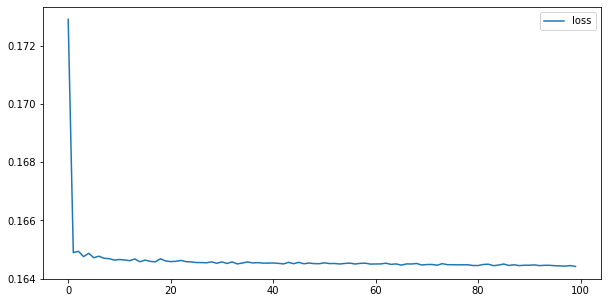

In [74]:
loss_df = pd.DataFrame(history.history)

# Plot loss vs epochs

loss_df.plot(figsize=(10,5))

In [76]:
model.evaluate(X_test, Y_test)

611/611 [==============================] - 1s 1ms/step - loss: 0.1673


0.16729828715324402

In [85]:
model.predict([[20]])

array([[[0.5762468]]], dtype=float32)

In [87]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [88]:
from sklearn.model_selection import cross_validate
results = cross_validate(classifier , X , Y , cv=5)
print(results)

{'fit_time': array([0.06372094, 0.06161714, 0.06779861, 0.0599792 , 0.06111526]), 'score_time': array([0.00250149, 0.00222158, 0.00218296, 0.0022366 , 0.00233603]), 'test_score': array([0.81298023, 0.79463142, 0.79155781, 0.49341735, 0.32426617])}


In [89]:
y_pred=classifier.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.7683126728818769

In [92]:
from sklearn.svm import SVC
classifier2=SVC(gamma='auto')
classifier2.fit(X_train,Y_train)

SVC(gamma='auto')

In [ ]:
SVM_result=cross_validate(classifier2,X,Y,cv=5)
SVM_result

In [ ]:
y_pred_classifier2 = classifier2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_classifier2,Y_test)
